# Manuscript Visualisation

This notebook implements visualisation of manuscript representations.

Load manuscript images

In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms

image_size = 500

transform = transforms.Compose([transforms.Resize(image_size),
                                transforms.CenterCrop(image_size-1),
                                transforms.ToTensor()])
manuscript_dataset = datasets.ImageFolder('../data/images/', transform=transform)
manuscript_label_to_name =  {value:key for key, value in manuscript_dataset.class_to_idx.items()}

manuscript_dataloader = torch.utils.data.DataLoader(manuscript_dataset, batch_size=128, shuffle=False)

image_batch, label_batch = next(iter(manuscript_dataloader))

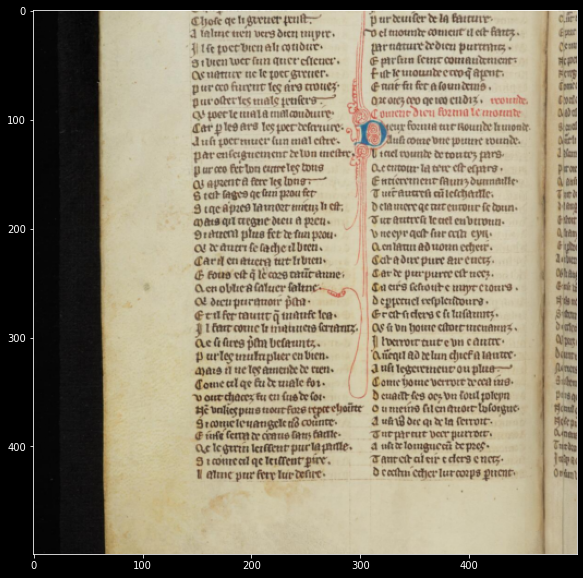

In [2]:
import matplotlib.pyplot as plt

def plot_image(image_tensor, gray=True):
    if isinstance(image_tensor, torch.Tensor):
        image_tmp = image_tensor.clone()
        image_tmp = image_tmp.numpy()
        image_tmp=np.swapaxes(image_tmp,0,1)
        image_tmp=np.swapaxes(image_tmp,1,2)
        
    elif isinstance(image_tensor, np.ndarray):
        image_tmp = image_tensor.copy()
    fig = plt.figure(figsize=(10,10))
    if gray:
        plt.imshow(image_tmp, cmap='gray')
    else:
        plt.imshow(image_tmp)
    plt.show()
plot_image(image_batch[0])


Load pre-calculated manuscript vectors

In [3]:
manuscript_vectors = np.load('numpy/vectors.npy')
manuscript_labels = np.load('numpy/labels.npy')

## Data formatting and plotting

Make a dataframe - group the rows by manuscript

In [4]:
import pandas as  pd

manuscript_dataframe = pd.DataFrame({'vector': [x for x in manuscript_vectors], 'label': manuscript_labels})
manuscript_dataframe['manuscript'] = [manuscript_label_to_name[label] for label in manuscript_dataframe['label']]
manuscript_groups = manuscript_dataframe.groupby(by='manuscript')

manuscript_groups.groups

{'astro-christ': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], 'astro-chronicle_nurem': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33], 'astro-islam': [34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'natural-history': [51], 'natural-poetry': [52]}

Visualise similarity between one particular image and the whole dataset

In [5]:
from scipy import spatial

def cosine_similarity(vector1, vector2):
    return 1 - spatial.distance.cosine(vector1, vector2)

index = 2

row_for_this_image = manuscript_dataframe.iloc[index]
vector_for_this_image = row_for_this_image['vector']
manuscript_for_this_image = row_for_this_image['manuscript']

# rows_from_the_same_manuscript = manuscript_groups.get_group(manuscript_for_this_image).copy()

manuscript_dataframe['cosine'] = manuscript_dataframe['vector'].apply(lambda x: cosine_similarity(x, vector_for_this_image))
print(manuscript_dataframe[['manuscript', 'cosine']])

               manuscript    cosine
0            astro-christ  0.910251
1            astro-christ  0.905553
2            astro-christ  1.000000
3            astro-christ  0.948101
4            astro-christ  0.934670
5            astro-christ  0.949894
6            astro-christ  0.926902
7            astro-christ  0.931171
8            astro-christ  0.942654
9            astro-christ  0.926092
10           astro-christ  0.913272
11           astro-christ  0.890164
12           astro-christ  0.913651
13           astro-christ  0.903523
14  astro-chronicle_nurem  0.793192
15  astro-chronicle_nurem  0.795392
16  astro-chronicle_nurem  0.829517
17  astro-chronicle_nurem  0.824156
18  astro-chronicle_nurem  0.690771
19  astro-chronicle_nurem  0.816996
20  astro-chronicle_nurem  0.818727
21  astro-chronicle_nurem  0.813431
22  astro-chronicle_nurem  0.785628
23  astro-chronicle_nurem  0.819226
24  astro-chronicle_nurem  0.787088
25  astro-chronicle_nurem  0.789655
26  astro-chronicle_nurem  0

Visulise the similarity between images from the same manuscript

      manuscript    cosine
2   astro-christ  1.000000
5   astro-christ  0.949894
3   astro-christ  0.948101
8   astro-christ  0.942654
4   astro-christ  0.934670
7   astro-christ  0.931171
6   astro-christ  0.926902
9   astro-christ  0.926092
12  astro-christ  0.913651
10  astro-christ  0.913272
0   astro-christ  0.910251
1   astro-christ  0.905553
13  astro-christ  0.903523
11  astro-christ  0.890164


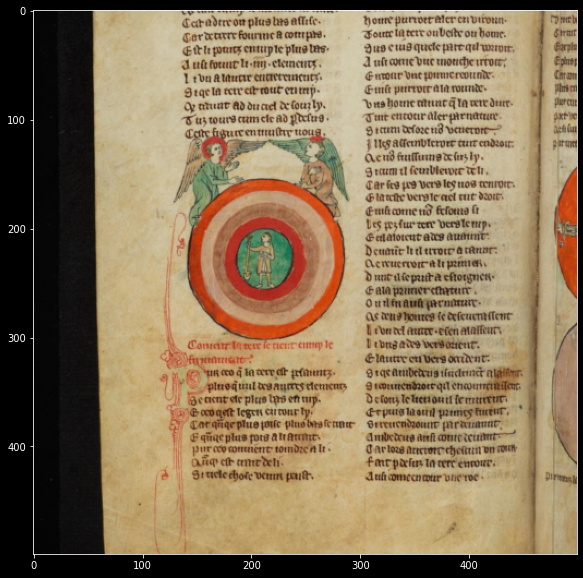

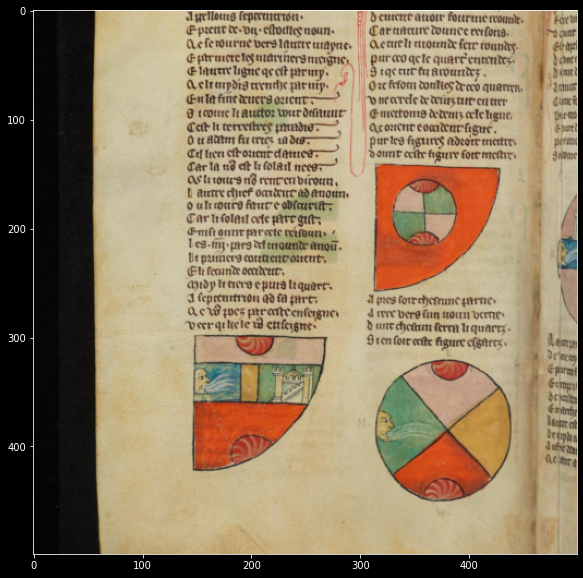

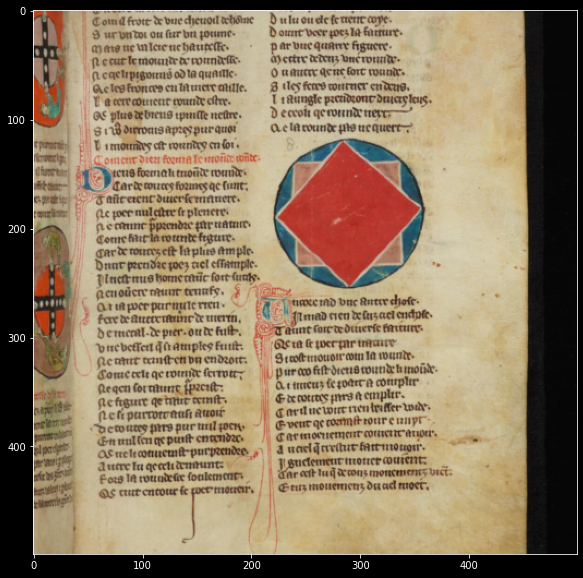

In [6]:
index = 2

row_for_this_image = manuscript_dataframe.iloc[index]
vector_for_this_image = row_for_this_image['vector']
manuscript_for_this_image = row_for_this_image['manuscript']

rows_from_the_same_manuscript = manuscript_groups.get_group(manuscript_for_this_image).copy()

rows_from_the_same_manuscript['cosine'] = rows_from_the_same_manuscript['vector'].apply(lambda x: cosine_similarity(x, vector_for_this_image))
print(rows_from_the_same_manuscript[['manuscript', 'cosine']].sort_values(by='cosine', ascending=False))
plot_image(image_batch[index])
plot_image(image_batch[8])
plot_image(image_batch[5])


Visualise similarity between image and a different manuscript

     manuscript    cosine
49  astro-islam  0.850292
48  astro-islam  0.834015
43  astro-islam  0.832215
47  astro-islam  0.830160
36  astro-islam  0.828599
39  astro-islam  0.824630
42  astro-islam  0.824140
38  astro-islam  0.822563
34  astro-islam  0.820188
37  astro-islam  0.818305
44  astro-islam  0.817474
50  astro-islam  0.814699
35  astro-islam  0.791027
41  astro-islam  0.790458
40  astro-islam  0.781475
46  astro-islam  0.771101
45  astro-islam  0.768430


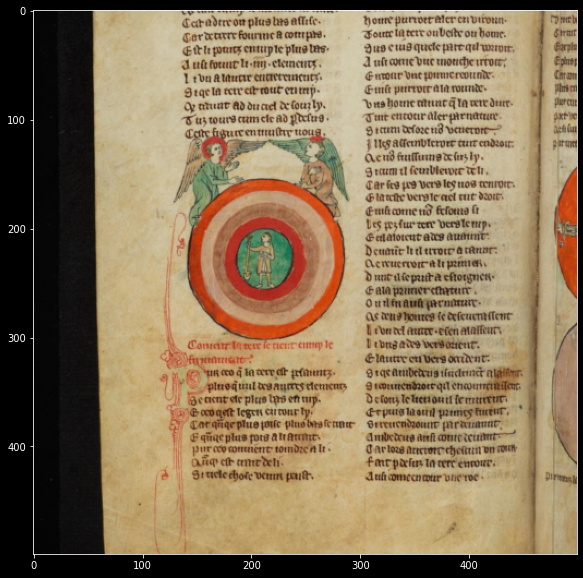

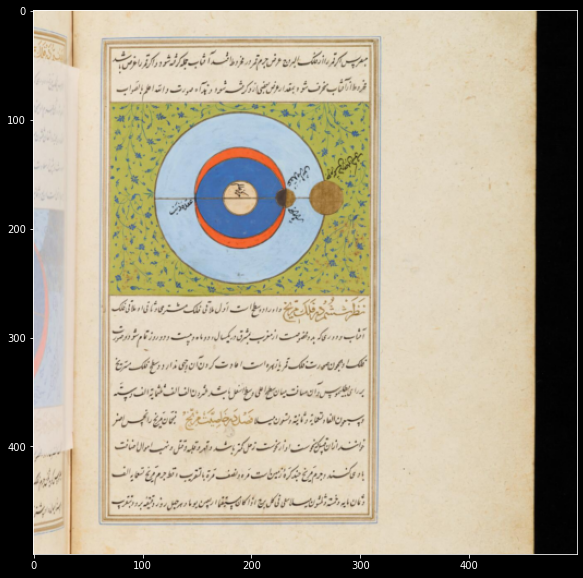

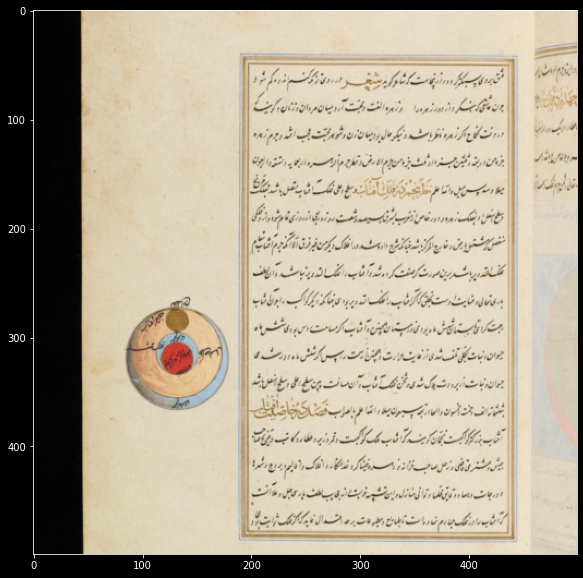

In [7]:
index = 2

row_for_this_image = manuscript_dataframe.iloc[index]
vector_for_this_image = row_for_this_image['vector']
manuscript_for_this_image = row_for_this_image['manuscript']

manuscript_name = 'astro-islam'
rows_from_the_different_manuscript = manuscript_groups.get_group(manuscript_name).copy()

rows_from_the_different_manuscript['cosine'] = rows_from_the_different_manuscript['vector'].apply(lambda x: cosine_similarity(x, vector_for_this_image))
print(rows_from_the_different_manuscript[['manuscript', 'cosine']].sort_values(by='cosine', ascending=False))

plot_image(image_batch[index])
plot_image(image_batch[47])
plot_image(image_batch[44])

               manuscript    cosine
27  astro-chronicle_nurem  0.845245
30  astro-chronicle_nurem  0.835924
32  astro-chronicle_nurem  0.833851
31  astro-chronicle_nurem  0.831894
16  astro-chronicle_nurem  0.829517
17  astro-chronicle_nurem  0.824156
23  astro-chronicle_nurem  0.819226
20  astro-chronicle_nurem  0.818727
29  astro-chronicle_nurem  0.818080
19  astro-chronicle_nurem  0.816996
21  astro-chronicle_nurem  0.813431
15  astro-chronicle_nurem  0.795392
14  astro-chronicle_nurem  0.793192
28  astro-chronicle_nurem  0.790242
25  astro-chronicle_nurem  0.789655
26  astro-chronicle_nurem  0.787411
24  astro-chronicle_nurem  0.787088
22  astro-chronicle_nurem  0.785628
33  astro-chronicle_nurem  0.710872
18  astro-chronicle_nurem  0.690771


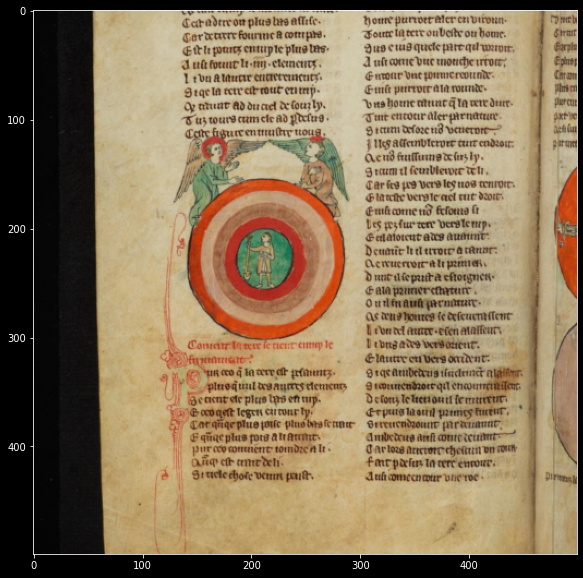

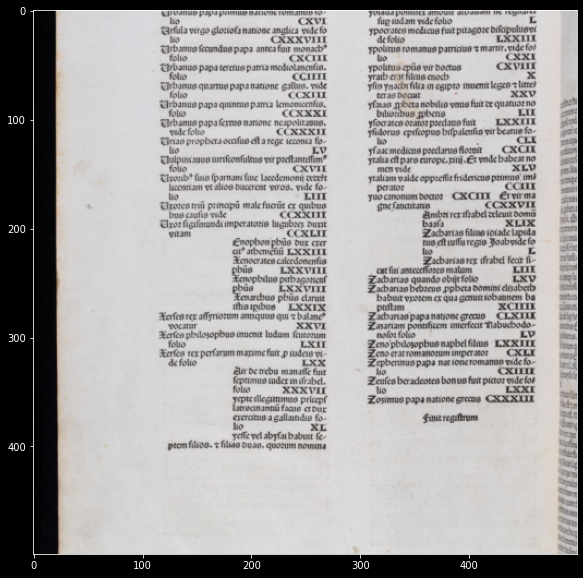

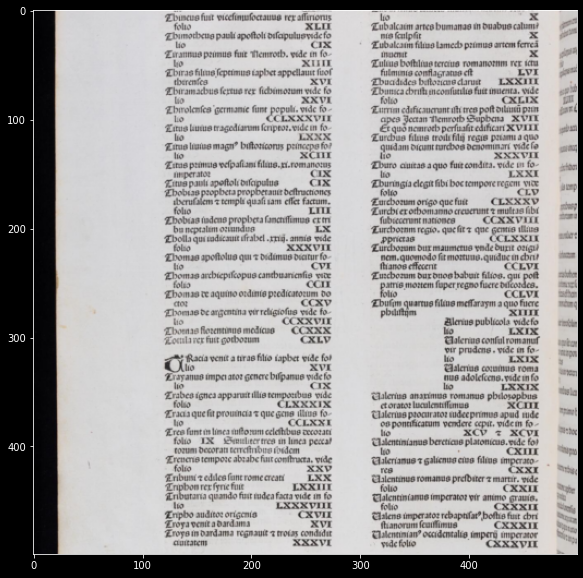

In [8]:
index = 2

row_for_this_image = manuscript_dataframe.iloc[index]
vector_for_this_image = row_for_this_image['vector']
manuscript_for_this_image = row_for_this_image['manuscript']

manuscript_name = 'astro-chronicle_nurem'
rows_from_the_different_manuscript = manuscript_groups.get_group(manuscript_name).copy()

rows_from_the_different_manuscript['cosine'] = rows_from_the_different_manuscript['vector'].apply(lambda x: cosine_similarity(x, vector_for_this_image))
print(rows_from_the_different_manuscript[['manuscript', 'cosine']].sort_values(by='cosine', ascending=False))

plot_image(image_batch[index])
plot_image(image_batch[16])
plot_image(image_batch[14])

Average similarity between manuscripts

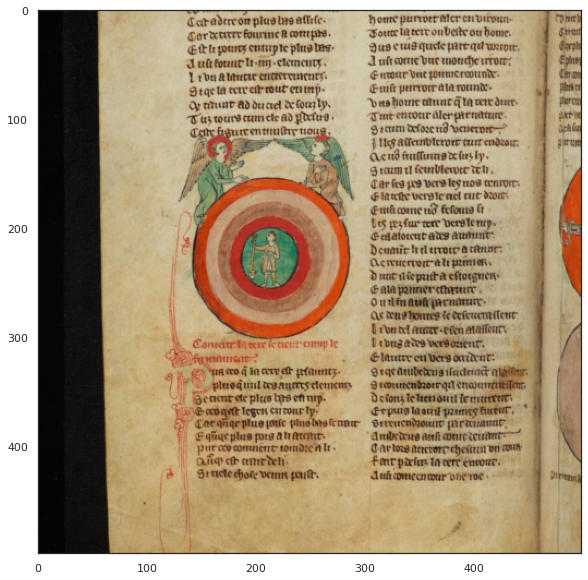

/rds-d2/user/wjm41/hpc-work/conda/envs/cdh/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Histogram of Similarity for a page from astro-christ')

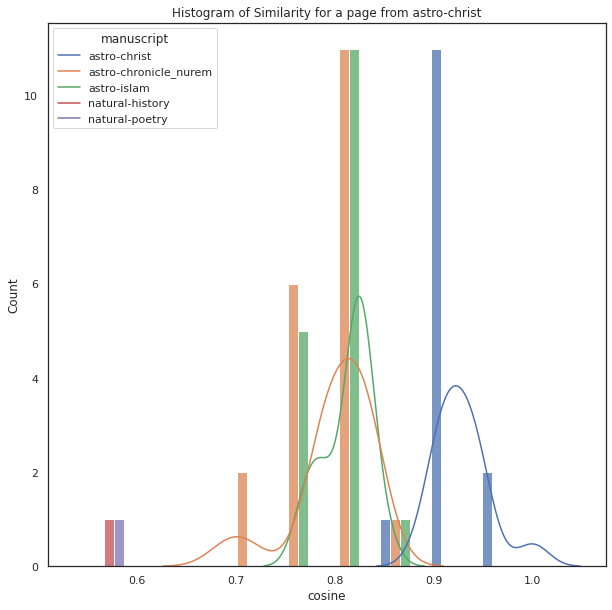

In [38]:
import seaborn as sns

sns.set_style('white')

index = 2

row_for_this_image = manuscript_dataframe.iloc[index]
vector_for_this_image = row_for_this_image['vector']
manuscript_for_this_image = row_for_this_image['manuscript']

manuscript_dataframe['cosine'] = manuscript_dataframe['vector'].apply(lambda x: cosine_similarity(x, vector_for_this_image))

plot_image(image_batch[index])
fig = plt.figure(figsize=(10,10))
# sns.set(rc={'figure.figsize':(14, 14)})
ax = plt.gca()
sns.histplot(data=manuscript_dataframe, 
            x='cosine', 
            hue='manuscript', 
            multiple='dodge',
            ax=ax,
            )
sns.kdeplot(data=manuscript_dataframe, 
            x='cosine', 
            hue='manuscript', 
            multiple='layer',
            ax=ax,
            )
plt.title(f'Histogram of Similarity for a page from {manuscript_for_this_image}')